# Exploratory data analysis (EDA)

EDA: Task of analysing data using simple ploting tool, statistic, linear alzebra and some other techniqe. as we don't know anything about the data

Objective: Classify a given flower based on 4 fetures to these three class.

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preview of data

In [208]:
iris = pd.read_csv("iris.csv")

In [209]:
print(iris.shape)

(150, 6)


In [210]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S.N           150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [211]:
iris.head()

,S.N,Sepal_Length,Sepal_Width,Petal_length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [212]:
df = pd.DataFrame(iris)

In [213]:
iris = df.drop(['S.N'], axis = 1) # droping S.N column from the data

In [214]:
print(iris.columns)

Index(['Sepal_Length', 'Sepal_Width', 'Petal_length', 'Petal_Width',
       'Species'],
      dtype='object')


In [215]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [216]:
iris.groupby('Species').mean()


,Sepal_Length,Sepal_Width,Petal_length,Petal_Width
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [217]:
iris.groupby('Species').median()

,Sepal_Length,Sepal_Width,Petal_length,Petal_Width
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [218]:
iris.groupby('Species').std()

,Sepal_Length,Sepal_Width,Petal_length,Petal_Width
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


# Visualisation of data

*************************************************
## pie plot

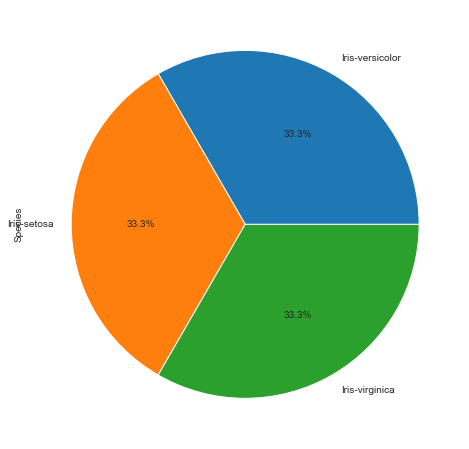

In [219]:
iris.Species.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.show()


## 2-D Scatter plot

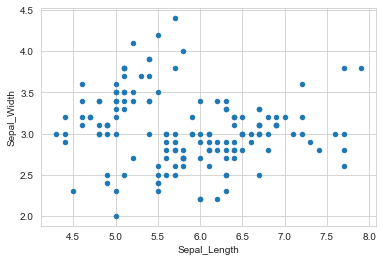

In [220]:
iris.plot(kind = 'scatter', x='Sepal_Length', y='Sepal_Width')
plt.show()

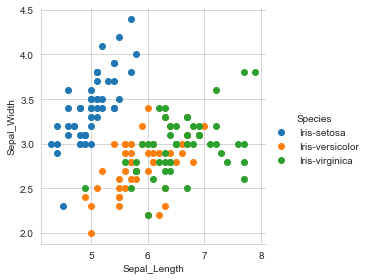

In [221]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue= "Species",height = 4) \
    .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
    .add_legend()

plt.show()

## Pair-plot

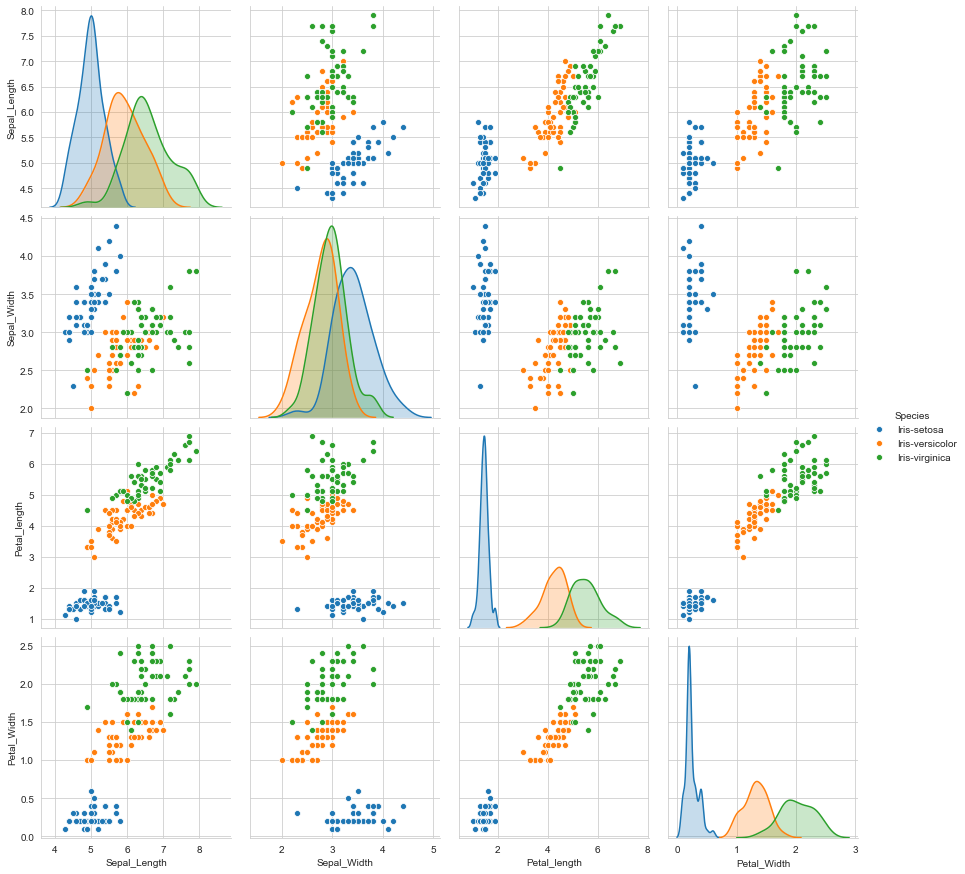

In [222]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species", height = 3)
plt.show()

## Histogram, PDF, CDF

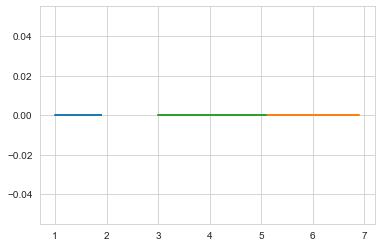

In [223]:
# 1-D scatter plot using just one feature
# plot of petal length

import numpy as np
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"]

plt.plot(iris_setosa["Petal_length"], np.zeros_like(iris_setosa['Petal_length']))
plt.plot(iris_virginica["Petal_length"], np.zeros_like(iris_virginica['Petal_length']))
plt.plot(iris_versicolor["Petal_length"], np.zeros_like(iris_versicolor['Petal_length']))
plt.show()

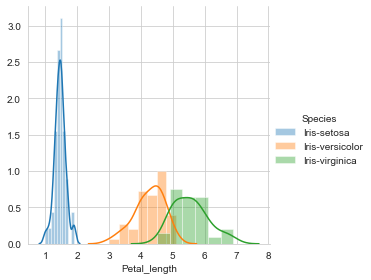

In [224]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue= "Species",height = 4) \
    .map(sns.distplot, "Petal_length") \
    .add_legend()

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


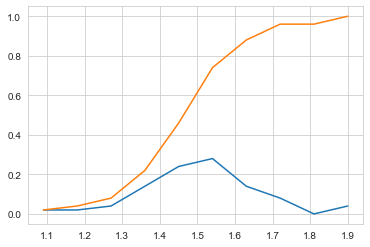

In [225]:
# plot of CDF of petal length

counts, bin_edges = np.histogram(iris_setosa['Petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


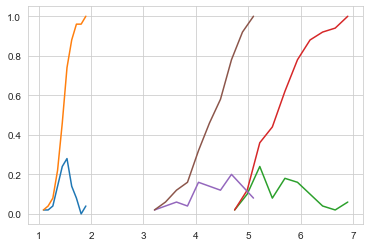

In [226]:
## For setosa ##
counts, bin_edges = np.histogram(iris_setosa['Petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

## For virginica ##
counts, bin_edges = np.histogram(iris_virginica['Petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


## For versicolor ##
counts, bin_edges = np.histogram(iris_versicolor['Petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

## Mean, Variance and Std-deviation

In [227]:
print("Setosa: ")
iris_setosa.describe()


Setosa: 


,Sepal_Length,Sepal_Width,Petal_length,Petal_Width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [228]:
print("Virginica: ")
iris_virginica.describe()

Virginica: 


,Sepal_Length,Sepal_Width,Petal_length,Petal_Width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [229]:
print("Versicolor: ")
iris_versicolor.describe()


Versicolor: 


,Sepal_Length,Sepal_Width,Petal_length,Petal_Width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [230]:
print("medians: \n")
print(np.median(iris_setosa["Petal_length"]))
print(np.median(iris_virginica["Petal_length"]))
print(np.median(iris_versicolor["Petal_length"]))

medians: 

1.5
5.55
4.35


In [231]:
# Quantiles

print("Quantiles: \n")
print(np.percentile(iris_setosa["Petal_length"], np.arange(1,100,25)))
print(np.percentile(iris_virginica["Petal_length"], np.arange(1,100,25)))
print(np.percentile(iris_versicolor["Petal_length"], np.arange(1,100,25)))

Quantiles: 

[1.049 1.4   1.5   1.6  ]
[4.647 5.1   5.599 5.9  ]
[3.147 4.    4.399 4.6  ]


In [232]:
# 90th Percentile

print("90th percentiles: \n")
print(np.percentile(iris_setosa["Petal_length"], 90))
print(np.percentile(iris_virginica["Petal_length"], 90))
print(np.percentile(iris_versicolor["Petal_length"], 90))

90th percentiles: 

1.7
6.3100000000000005
4.8


In [233]:
print("Maximum Values: \n")
print(iris_setosa["Petal_length"].max())
print(iris_virginica["Petal_length"].max())
print(iris_versicolor["Petal_length"].max())

Maximum Values: 

1.9
6.9
5.1


## Median absolute deviation(mad)

In [234]:
from statsmodels import robust

print("\nMedian Absolute Deviation:\n ")
print(robust.mad(iris_setosa["Petal_length"]))
print(robust.mad(iris_virginica["Petal_length"]))
print(robust.mad(iris_versicolor["Petal_length"]))




Median Absolute Deviation:
 
0.14826022185056031
0.6671709983275211
0.5189107764769602


## Box plot and wishkers

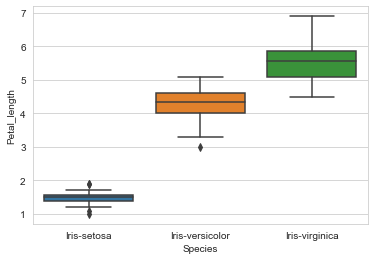

In [235]:
sns.boxplot(x= 'Species', y= 'Petal_length', data= iris)
plt.show()

## Violin plot

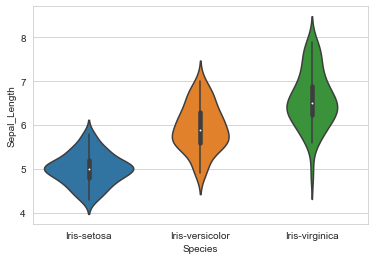

In [236]:
sns.violinplot(x= 'Species', y= 'Sepal_Length', data= iris, size=10)
plt.show()

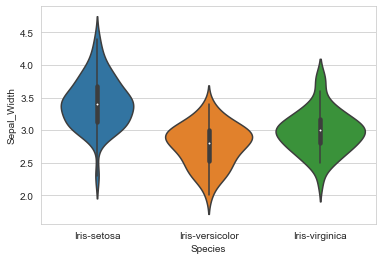

In [237]:
sns.violinplot(x= 'Species', y= 'Sepal_Width', data= iris, size=10)
plt.show()

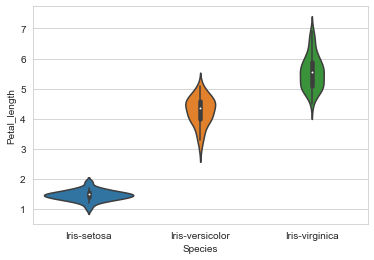

In [238]:
sns.violinplot(x= 'Species', y= 'Petal_length', data= iris, size=10)
plt.show()

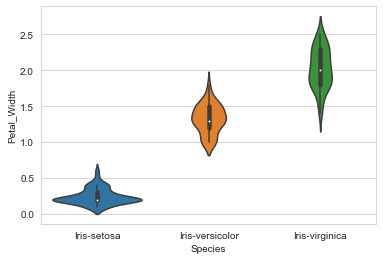

In [239]:
sns.violinplot(x= 'Species', y= 'Petal_Width', data= iris, size=10)
plt.show()

## Heat map of correlation between features

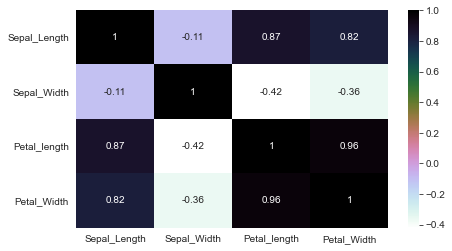

In [240]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

## Multivariate Probabiity density contour plot

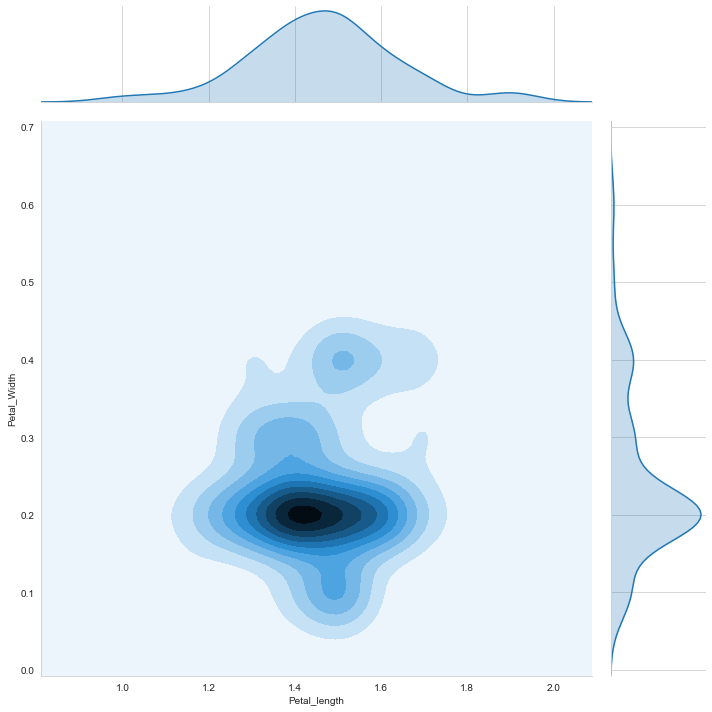

In [241]:
sns.jointplot(x="Petal_length", y="Petal_Width",data= iris_setosa, kind="kde", height=10)
plt.show()

# Using machine learning for classification

********************************************************************************


## Splitting The Data into Training And Testing Dataset

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [243]:
encode = LabelEncoder()

In [244]:
x = iris.drop('Species', axis = 1)
x.head()

,Sepal_Length,Sepal_Width,Petal_length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [245]:
y = iris.Species
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [246]:
y_encoded = encode.fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [248]:
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded,test_size=0.3,random_state=4)

In [249]:
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [250]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


## Logistic Regression model 

In [251]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [252]:
lr =  LogisticRegression()

In [253]:
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [254]:
y_predicted = lr.predict(x_test)

In [255]:
print(y_predicted)
print(y_test)
print("Accuracy of LR model is:", accuracy_score(y_test, y_predicted))

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]
Accuracy of LR model is: 0.9777777777777777


## KNN model

In [256]:
from sklearn.neighbors import KNeighborsClassifier

In [257]:
knn = KNeighborsClassifier(n_neighbors=3)

In [258]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [259]:
prediction=knn.predict(x_test)
print("The accuracy of the KNN is:" ,accuracy_score(prediction,y_test))

The accuracy of the KNN is: 0.9777777777777777


<ipython-input-261-90f8daf045dc>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

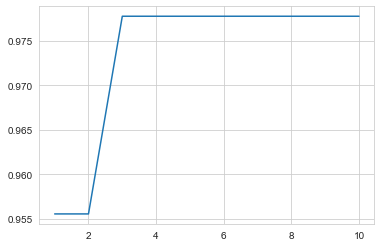

In [261]:
##Iterating  with k value

a_index=list(range(1,11))
a=pd.Series()
#x=[1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

## SVM

In [262]:
from sklearn import svm

In [263]:
csvm = svm.SVC()

In [264]:
csvm.fit(x_train,y_train)

SVC()

In [265]:
predicted = csvm.predict(x_test)

In [268]:
print("The accuracy of the SVM is:" ,accuracy_score(predicted,y_test))

The accuracy of the SVM is: 0.9777777777777777


## Decision tree

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
dt = DecisionTreeClassifier()

In [272]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [273]:
predicted = dt.predict(x_test)


In [274]:
print("The accuracy of the Decision Tree is:" ,accuracy_score(predicted,y_test))

The accuracy of the Decision Tree is: 0.9777777777777777
